# Sprint 7 · Webinar 19 · Data Analytics teórico (Preparación de datos + distribuciones + Git/GitHub)


## Fecha

14 de diciembre de 2025


## Objetivos de la sesión teórica

Al finalizar la sesión, el/la estudiante podrá:

- Preparar un dataset “realista” para análisis estadístico: identificar variables relevantes, manejar valores ausentes/ inválidos y automatizar limpieza con Python.
- Usar estructuras básicas del lenguaje (iterables, bucles `for` / `while`) para recorrer y transformar datos.
- Escribir mini-funciones reutilizables de limpieza de datos (primera aproximación a “data pipelines” simples).
- Describir distribuciones numéricas y categóricas mediante estadísticas y visualizaciones (histogramas y boxplots).
- Traducir el comportamiento de una distribución a significado de negocio (qué implica para churn, tickets, gasto, etc.).
- Dar los primeros pasos en control de versiones: instalar Git, crear cuenta en GitHub y entender el flujo básico.

> Nota: este notebook está diseñado para principiantes. El código está comentado y se apoya en un dataset con “problemas” intencionales para practicar limpieza.


## Agenda sugerida (100 minutos)

1. Contexto del caso + dataset (5 min)  
2. Ejercicio 0: discusión guiada (breakout rooms) (10 min)  
3. Ejercicio 1: preparación de datos para análisis estadístico (30 min)  
4. Ejercicio 2: automatización con funciones + bucles (25 min)  
5. Ejercicio 3: describiendo distribuciones (estadística + visualización) (25 min)  
6. Cierre: Git/GitHub (instalación y primeros pasos) (5 min)  


## Ejercicio 0 · Calentamiento en breakout rooms (discusión conceptual, 10 min)

En grupos pequeños, discutan y respondan:

1. ¿Qué hace que un dataset sea “apto” para análisis estadístico? (pista: tipos de datos, valores faltantes, valores inválidos, sesgos)
2. Si tu objetivo fuera explicar **por qué algunos clientes hacen churn**, ¿qué variables buscarías primero y por qué?
3. Si ves valores como `age = 999` o `total_spend_90d_usd = -120`, ¿qué harías antes de “arreglarlo”?
4. ¿En qué casos **NO** conviene imputar valores faltantes con promedios?

Luego, compartan 2 conclusiones con el grupo.


## Ejercicio 1 · Preparación de datos para análisis estadístico (7.1)

En este ejercicio cargaremos un dataset “extenso” de clientes en LatAm (5.000 filas) con variables de comportamiento (compras, tickets, satisfacción), producto (plan), y resultado (churn).  
El dataset incluye valores faltantes e inválidos **intencionalmente** para practicar.

### 7.1.1 Identificando variables relevantes para el análisis

- Una **variable relevante** es aquella que ayuda a explicar o predecir un fenómeno de interés (p. ej., churn).  
- Se seleccionan variables por:
  - **Preguntas de negocio**: “¿Qué se asocia a churn?”  
  - **Disponibilidad y calidad**: si una columna es casi todo vacío o inconsistente, quizá no sirve (aún).
  - **Tipo de dato**: numérica vs categórica vs temporal.
  - **Riesgo de fuga de información (leakage)**: variables que revelan el resultado de forma directa (evitar).

Vamos a empezar con una exploración básica para ubicar columnas, tipos y problemas.


In [5]:
# 1) Librerías base para el webinar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# (Opcional) para ver más columnas en pantalla
pd.set_option('display.max_columns', 50)

# 2) Cargar el dataset (ajusta la ruta si es necesario)
DATA_PATH = "datasets/webinar19_customers_latam.csv"
df = pd.read_csv(DATA_PATH)

print("Filas y columnas:", df.shape)
df.head()


Filas y columnas: (5000, 20)


,customer_id,country,city,segment,signup_date,last_activity_date,device_os,plan_type,monthly_fee_usd,orders_90d,avg_order_value_usd,total_spend_90d_usd,support_tickets_90d,satisfaction_score,coupon_used,preferred_category,churned,age,monthly_fee_raw,last_activity_raw
0,C000001,México,CDMX,Retail,2024-08-23,2025-08-07,macOS,Basic,30.76,4,24.42,97.69,1,4.0,yes,Moda,0,27.0,30.76,2025-08-07
1,C000002,Argentina,Mendoza,SMB,2025-06-22,2025-12-26,iOS,Pro,65.80,6,26.20,157.18,2,4.3,yes,Moda,0,26.0,65.8,2025-12-26
2,C000003,Colombia,Medellín,Retail,2024-09-02,2024-12-02,Android,Plus,49.18,2,22.13,44.25,0,4.2,yes,Alimentos,1,27.0,49.18,2024-12-02
3,C000004,Colombia,Barranquilla,SMB,2025-11-01,2025-12-28,Linux,Basic,15.66,7,30.46,213.23,0,3.4,no,Hogar,0,45.0,15.66,2025-12-28
4,C000005,Colombia,Bogotá,Retail,2024-12-29,2025-09-20,Windows,Plus,NaN,4,38.71,154.85,0,4.1,yes,Belleza,0,45.0,NaN,2025-09-20


In [6]:
# 3) Vista rápida de tipos de datos y valores faltantes
df.info()

# 4) Contar valores faltantes por columna (NaN)
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          5000 non-null   object 
 1   country              4950 non-null   object 
 2   city                 4950 non-null   object 
 3   segment              5000 non-null   object 
 4   signup_date          5000 non-null   object 
 5   last_activity_date   5000 non-null   object 
 6   device_os            5000 non-null   object 
 7   plan_type            5000 non-null   object 
 8   monthly_fee_usd      4850 non-null   float64
 9   orders_90d           5000 non-null   int64  
 10  avg_order_value_usd  5000 non-null   float64
 11  total_spend_90d_usd  5000 non-null   float64
 12  support_tickets_90d  5000 non-null   int64  
 13  satisfaction_score   5000 non-null   float64
 14  coupon_used          5000 non-null   object 
 15  preferred_category   5000 non-null   o

age                    296
monthly_fee_raw        169
monthly_fee_usd        150
country                 50
city                    50
last_activity_raw       13
segment                  0
customer_id              0
plan_type                0
signup_date              0
device_os                0
last_activity_date       0
total_spend_90d_usd      0
avg_order_value_usd      0
orders_90d               0
support_tickets_90d      0
preferred_category       0
coupon_used              0
satisfaction_score       0
churned                  0
dtype: int64

### 7.1.2 Manejando valores ausentes o inválidos

En la práctica, no solo hay “faltantes”; también hay **inválidos** (ej.: edades negativas, fechas imposibles, montos negativos).

Estrategias típicas:

- **Eliminar** filas (si son pocas y no sesgan el análisis).
- **Reemplazar / imputar**:
  - numéricas: media/mediana (dependiendo de sesgo), o imputación por grupo (p. ej., por plan/segmento).
  - categóricas: “Unknown/No disponible”.
- **Corregir**: cuando el valor es inválido pero recuperable (p. ej., normalizar un texto).
- **Marcar**: crear columnas “flag” (por ejemplo `is_age_invalid`) para no perder información.

Primero detectemos valores claramente inválidos.


In [7]:
# Reglas simples de validación (rules of thumb) para este caso
# Nota: Las reglas dependen del contexto. Aquí usaremos ejemplos razonables.

# 1) Edades inválidas: <= 0 o > 100
age_invalid_mask = (df["age"].isna()) | (df["age"] <= 0) | (df["age"] > 100)
print("Edad faltante o inválida:", age_invalid_mask.mean().round(3), "proporción")

Edad faltante o inválida: 0.071 proporción


In [8]:
# 2) Gasto negativo en 90 días
spend_negative_mask = df["total_spend_90d_usd"] < 0
print("Gasto negativo:", spend_negative_mask.mean().round(3), "proporción")

Gasto negativo: 0.006 proporción


In [9]:
# 3) País / ciudad vacíos
country_empty_mask = df["country"].fillna("").str.strip().eq("")
city_empty_mask = df["city"].fillna("").str.strip().eq("")
print("Country vacío:", country_empty_mask.mean().round(3))
print("City vacío:", city_empty_mask.mean().round(3))

Country vacío: 0.01
City vacío: 0.01


In [10]:
# 4) Vista de algunos ejemplos problemáticos
df.loc[age_invalid_mask | spend_negative_mask | country_empty_mask | city_empty_mask].head(10)

,customer_id,country,city,segment,signup_date,last_activity_date,device_os,plan_type,monthly_fee_usd,orders_90d,avg_order_value_usd,total_spend_90d_usd,support_tickets_90d,satisfaction_score,coupon_used,preferred_category,churned,age,monthly_fee_raw,last_activity_raw
7,C000008,México,CDMX,Enterprise,2025-11-03,2026-04-19,iOS,Plus,50.65,16,24.33,389.20,0,4.8,no,Hogar,0,NaN,50.65,2026-04-19
26,C000027,México,CDMX,Retail,2025-09-30,2026-06-08,iOS,Plus,43.53,0,48.26,0.00,2,4.9,no,Deportes,0,NaN,43.53,2026-06-08
35,C000036,Chile,Concepción,SMB,2025-11-14,2025-12-10,iOS,Basic,19.90,2,63.02,126.04,1,4.4,no,Belleza,0,NaN,19.9,2025-12-10
43,C000044,México,Monterrey,Retail,2024-10-23,2025-09-05,Windows,Basic,20.89,4,72.56,290.25,1,3.7,yes,Juguetes,1,NaN,20.89,2025-09-05
49,C000050,NaN,Arequipa,Retail,2024-11-18,2025-11-15,Windows,Basic,NaN,3,19.71,59.13,2,4.2,yes,Alimentos,0,31.0,NaN,2025-11-15
51,C000052,Perú,Trujillo,Retail,2025-07-03,2025-10-23,iOS,Basic,23.27,3,11.41,34.23,2,2.8,no,Alimentos,1,NaN,23.27,2025-10-23
55,C000056,Colombia,Cali,Retail,2025-04-02,2026-04-30,iOS,Basic,24.52,1,49.18,49.18,1,4.6,no,Hogar,0,NaN,24.52,2026-04-30
63,C000064,NaN,Monterrey,SMB,2024-05-22,2024-12-17,iOS,Basic,16.41,7,25.52,178.66,0,4.8,yes,Juguetes,1,41.0,16.41,2024-12-17
77,C000078,Argentina,NaN,Retail,2024-01-10,2025-02-06,Linux,Basic,27.24,6,42.58,255.47,1,3.9,no,Belleza,1,41.0,27.24,2025-02-06
91,C000092,Colombia,Medellín,Retail,2024-04-14,2024-12-08,Windows,Plus,50.73,3,20.25,60.75,1,3.9,no,Belleza,1,NaN,50.73,2024-12-08


### 7.1.3 Funciones de Python para automatizar la limpieza de datos

Antes de escribir “funciones propias”, aprovechamos funciones estándar:

- `pd.to_datetime(...)` para convertir fechas (con `errors="coerce"` para convertir inválidos a `NaT`).
- `pd.to_numeric(...)` para convertir numéricos (con `errors="coerce"` para convertir inválidos a `NaN`).
- `str.strip()`, `str.lower()` para normalizar texto.
- `fillna(...)`, `dropna(...)` para manejar faltantes.

Apliquemos esto a columnas “raw” que vienen como texto: `monthly_fee_raw` y `last_activity_raw`.


In [11]:
# 1) Convertir monthly_fee_raw a numérico (los 'N/A' y 'unknown' se vuelven NaN)
df["monthly_fee_clean"] = pd.to_numeric(df["monthly_fee_raw"], errors="coerce")

In [12]:
# 2) Convertir last_activity_raw a fecha (fechas imposibles -> NaT)
df["last_activity_clean"] = pd.to_datetime(df["last_activity_raw"], errors="coerce")

In [13]:
# 3) Chequeos rápidos
print("monthly_fee_raw: NaN después de convertir:", df["monthly_fee_clean"].isna().mean().round(3))
print("last_activity_raw: NaT después de convertir:", df["last_activity_clean"].isna().mean().round(3))

df[["monthly_fee_raw", "monthly_fee_clean", "last_activity_raw", "last_activity_clean"]].head(10)

monthly_fee_raw: NaN después de convertir: 0.037
last_activity_raw: NaT después de convertir: 0.005


,monthly_fee_raw,monthly_fee_clean,last_activity_raw,last_activity_clean
0,30.76,30.76,2025-08-07,2025-08-07
1,65.8,65.80,2025-12-26,2025-12-26
2,49.18,49.18,2024-12-02,2024-12-02
3,15.66,15.66,2025-12-28,2025-12-28
4,NaN,NaN,2025-09-20,2025-09-20
5,45.53,45.53,2026-07-17,2026-07-17
6,23.89,23.89,2025-02-18,2025-02-18
7,50.65,50.65,2026-04-19,2026-04-19
8,47.07,47.07,2025-11-19,2025-11-19
9,36.58,36.58,2025-12-17,2025-12-17


## Ejercicio 2 · Automatización con iterables, bucles y mini-funciones (7.1.4–7.1.5)

### 7.1.4 Bucles (`for` & `while`) e iterables en una colección

- Un **iterable** es una colección que puedes recorrer elemento por elemento (lista, diccionario, Series, etc.).
- `for` se usa cuando sabes que vas a recorrer una colección completa (o un rango).
- `while` se usa cuando la repetición depende de una condición (ej.: “mientras haya valores inválidos…”).

En análisis de datos, un uso típico de `for` es aplicar reglas similares a varias columnas.


In [14]:
# Ejemplo 1: recorrer una lista de columnas numéricas para describirlas rápidamente
numeric_cols = ["age", "monthly_fee_clean", "orders_90d", "avg_order_value_usd", "total_spend_90d_usd",
                "support_tickets_90d", "satisfaction_score"]

for col in numeric_cols:
    # Ignoramos NaN automáticamente con pandas
    col_min = df[col].min()
    col_max = df[col].max()
    missing = df[col].isna().mean()
    print(f"{col:>20} | min={col_min:>8} | max={col_max:>8} | missing={missing:.3f}")


                 age | min=    -5.0 | max=   999.0 | missing=0.059
   monthly_fee_clean | min=   -10.0 | max=  191.86 | missing=0.037
          orders_90d | min=       0 | max=      23 | missing=0.000
 avg_order_value_usd | min=     3.8 | max=  233.53 | missing=0.000
 total_spend_90d_usd | min= -607.51 | max= 3505.99 | missing=0.000
 support_tickets_90d | min=       0 | max=       6 | missing=0.000
  satisfaction_score | min=     1.9 | max=     5.0 | missing=0.000


In [15]:
# Ejemplo 2 (conceptual): un while para corregir valores fuera de rango (con un límite de iteraciones)
# Nota: normalmente esto se resuelve con reglas vectorizadas, pero lo usamos para entender la lógica del while.

ages = df["age"].copy()

# Definimos una regla: edades > 100 son inválidas, las convertimos a NaN.
# Repetimos hasta que no queden edades > 100 (o hasta un máximo de iteraciones por seguridad).
max_iters = 5
iters = 0

while (ages > 100).any() and iters < max_iters:
    ages = ages.mask(ages > 100, np.nan)  # convierte >100 a NaN
    iters += 1

print("Iteraciones realizadas:", iters)
print("¿Quedan edades > 100?:", (ages > 100).any())


Iteraciones realizadas: 1
¿Quedan edades > 100?: False


### 7.1.5 Escribiendo tus primeras mini-funciones de limpieza de datos

Una mini-función de limpieza debe:

1. Recibir datos de entrada (por ejemplo un DataFrame).
2. Aplicar reglas claras (documentadas).
3. Devolver un resultado (DataFrame limpio o columnas limpias).
4. Ser fácil de reutilizar en otros datasets.

A continuación implementaremos dos funciones pequeñas:
- `clean_age(...)`: valida edad y decide cómo imputar.
- `clean_country_city(...)`: normaliza texto y maneja vacíos.


In [16]:
def clean_age(df: pd.DataFrame, col: str = "age", min_age: int = 16, max_age: int = 80) -> pd.DataFrame:
    """Limpia una columna de edad.

    Reglas:
    - Convierte a numérico (si viniera como texto).
    - Edades fuera de [min_age, max_age] se vuelven NaN.
    - Imputa NaN con la mediana del dataset (simple y robusto ante outliers).

    Retorna:
    - Una copia del DataFrame con una nueva columna: f"{col}_clean"
    """
    out = df.copy()

    # 1) Convertir a numérico
    out[col] = pd.to_numeric(out[col], errors="coerce")

    # 2) Invalidar edades fuera de rango
    invalid_mask = (out[col] < min_age) | (out[col] > max_age)
    out.loc[invalid_mask, col] = np.nan

    # 3) Imputar con mediana (ignorando NaN)
    median_age = out[col].median()
    out[f"{col}_clean"] = out[col].fillna(median_age)

    return out

In [17]:
def clean_country_city(df: pd.DataFrame, country_col: str = "country", city_col: str = "city") -> pd.DataFrame:
    """Normaliza columnas de país y ciudad y maneja vacíos.

    Reglas:
    - Quita espacios extra.
    - Estándar: primera letra mayúscula (title case).
    - Vacíos -> 'Unknown'
    """
    out = df.copy()

    for col in [country_col, city_col]:
        out[col] = out[col].fillna("").astype(str).str.strip()
        out[col] = out[col].replace("", "Unknown")
        out[col] = out[col].str.title()

    return out

In [18]:
# Aplicar las mini-funciones
df_clean = clean_age(df)
df_clean = clean_country_city(df_clean)

df_clean[["age", "age_clean", "country", "city"]].head(10)

,age,age_clean,country,city
0,27.0,27.0,México,Cdmx
1,26.0,26.0,Argentina,Mendoza
2,27.0,27.0,Colombia,Medellín
3,45.0,45.0,Colombia,Barranquilla
4,45.0,45.0,Colombia,Bogotá
5,28.0,28.0,Perú,Trujillo
6,37.0,37.0,Perú,Arequipa
7,NaN,32.0,México,Cdmx
8,44.0,44.0,Colombia,Bogotá
9,46.0,46.0,Argentina,Córdoba


## Ejercicio 3 · Describiendo distribuciones de datos (7.2)

### 7.2.1 Medidas estadísticas en columnas numéricas

Para columnas numéricas solemos calcular:

- **Tendencia central**: media, mediana.
- **Dispersión**: desviación estándar, rango intercuartílico (IQR).
- **Percentiles**: p25, p50, p75, p90, p95.
- **Asimetría (skew)**: indica si hay cola larga a la derecha/izquierda (útil para decidir mediana vs media).

Empezaremos con un resumen numérico y luego lo interpretamos.


In [19]:
# Resumen estadístico para numéricas (usando el DataFrame limpio)
num_cols = ["age_clean", "monthly_fee_clean", "orders_90d", "avg_order_value_usd",
            "total_spend_90d_usd", "support_tickets_90d", "satisfaction_score"]

summary_num = df_clean[num_cols].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95]).T
summary_num


,count,mean,std,min,25%,50%,75%,90%,95%,max
age_clean,5000.0,32.091000,8.286064,16.00,27.0000,32.00,37.000,43.000,46.000,65.00
monthly_fee_clean,4816.0,45.131244,33.998875,-10.00,24.9300,34.87,51.805,72.175,78.285,191.86
orders_90d,5000.0,4.379400,3.020742,0.00,2.0000,4.00,6.000,8.000,10.000,23.00
avg_order_value_usd,5000.0,31.830598,19.114518,3.80,18.8600,27.20,39.465,55.252,67.663,233.53
total_spend_90d_usd,5000.0,136.339096,140.361732,-607.51,53.6375,99.54,176.775,285.922,384.117,3505.99
support_tickets_90d,5000.0,0.654200,0.802715,0.00,0.0000,0.00,1.000,2.000,2.000,6.00
satisfaction_score,5000.0,4.081060,0.566981,1.90,3.7000,4.10,4.500,4.900,5.000,5.00


### 7.2.2 Medidas estadísticas en columnas categóricas

En categóricas, lo más útil suele ser:

- **Frecuencias** y **proporciones** por categoría.
- **Moda** (categoría más frecuente).
- Cardinalidad (número de categorías distintas): demasiadas categorías suelen requerir normalización o agrupación.

Calculemos esto para `plan_type`, `segment`, `country`, `device_os` y `preferred_category`.


In [20]:
cat_cols = ["plan_type", "segment", "country", "device_os", "preferred_category", "coupon_used"]

for col in cat_cols:
    counts = df_clean[col].value_counts(dropna=False)
    props = (counts / len(df_clean)).round(3)
    display(pd.DataFrame({"count": counts, "proportion": props}).head(10))


,count,proportion
plan_type,,
Basic,2514,0.503
Plus,1364,0.273
Pro,897,0.179
Enterprise,225,0.045


,count,proportion
segment,,
Retail,3456,0.691
SMB,1297,0.259
Enterprise,247,0.049


,count,proportion
country,,
Colombia,1734,0.347
México,1097,0.219
Perú,771,0.154
Argentina,751,0.150
Chile,597,0.119
Unknown,50,0.010


,count,proportion
device_os,,
Android,2068,0.414
iOS,1673,0.335
Windows,625,0.125
macOS,437,0.087
Linux,197,0.039


,count,proportion
preferred_category,,
Belleza,734,0.147
Hogar,733,0.147
Moda,722,0.144
Electrónica,722,0.144
Alimentos,713,0.143
Deportes,691,0.138
Juguetes,685,0.137


,count,proportion
coupon_used,,
no,3269,0.654
yes,1731,0.346


### 7.2.3 Visualizando distribuciones con histogramas

Un histograma permite ver:

- Concentración de valores (dónde se “acumulan”).
- Colas largas (posibles outliers o comportamientos raros).
- Si la distribución es aproximadamente normal o sesgada.

Graficaremos `total_spend_90d_usd` y `orders_90d`.


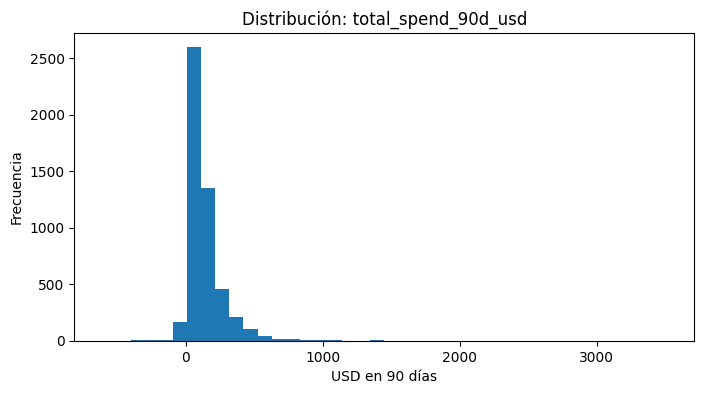

In [21]:
# Histograma de gasto total (90 días)
plt.figure(figsize=(8,4))
plt.hist(df_clean["total_spend_90d_usd"], bins=40)
plt.title("Distribución: total_spend_90d_usd")
plt.xlabel("USD en 90 días")
plt.ylabel("Frecuencia")
plt.show()

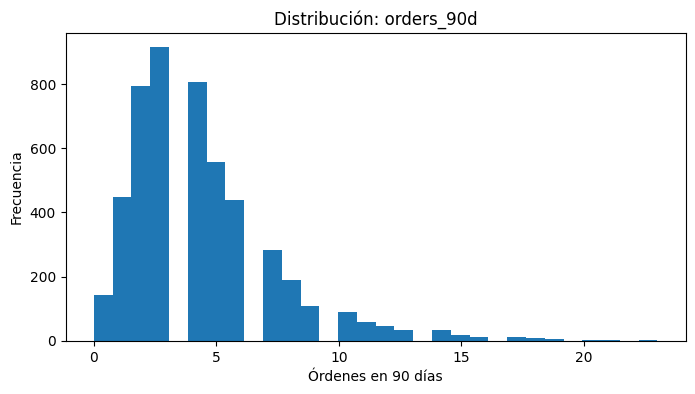

In [22]:
# Histograma de número de órdenes
plt.figure(figsize=(8,4))
plt.hist(df_clean["orders_90d"], bins=30)
plt.title("Distribución: orders_90d")
plt.xlabel("Órdenes en 90 días")
plt.ylabel("Frecuencia")
plt.show()

### 7.2.4 Visualizando distribuciones con boxplot

El boxplot resume una distribución con:

- Mediana (línea central).
- Cuartiles Q1 y Q3 (caja).
- IQR (Q3 - Q1).
- “Bigotes” y puntos extremos (posibles outliers según una regla).

Útil cuando quieres comparar distribuciones por grupo (por ejemplo: gasto por plan).


C:\Users\jeanp\AppData\Local\Temp\ipykernel_21276\208949831.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=True)


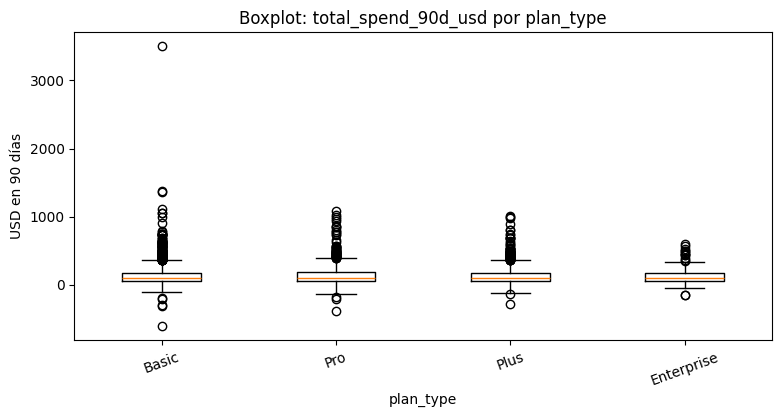

In [23]:
# Boxplot: gasto por tipo de plan (comparación por grupo)
plt.figure(figsize=(9,4))

# Preparamos los datos por grupo (lista de series)
groups = []
labels = []
for p in df_clean["plan_type"].unique():
    groups.append(df_clean.loc[df_clean["plan_type"] == p, "total_spend_90d_usd"])
    labels.append(p)

plt.boxplot(groups, labels=labels, showfliers=True)
plt.title("Boxplot: total_spend_90d_usd por plan_type")
plt.xlabel("plan_type")
plt.ylabel("USD en 90 días")
plt.xticks(rotation=20)
plt.show()


### 7.2.5–7.2.6 Entendiendo el significado de negocio de distribuciones

Las distribuciones no son solo “formas”; cuentan una historia:

- Si `total_spend_90d_usd` es muy sesgada a la derecha: hay pocos clientes que aportan gran parte del ingreso (segmentación, VIP).
- Si `support_tickets_90d` tiene cola larga: hay un grupo pequeño de clientes con alta fricción (posible churn, issues de producto).
- Si `satisfaction_score` está concentrada en valores altos: el producto “en general” satisface; pero los extremos bajos son críticos.

Hagamos una lectura rápida por churn: comparar medias/medianas por `churned`.


In [24]:
# Comparación simple por churn (0=activo, 1=churn)
metrics = ["total_spend_90d_usd", "orders_90d", "support_tickets_90d", "satisfaction_score", "monthly_fee_clean", "age_clean"]

group_stats = df_clean.groupby("churned")[metrics].agg(["mean", "median"])
group_stats


total_spend_90d_usd          orders_90d        support_tickets_90d  \
                       mean   median       mean median                mean   
churned                                                                      
0                137.855274  101.895   4.408681    4.0            0.644963   
1                134.891673   97.710   4.351446    4.0            0.663018   

               satisfaction_score        monthly_fee_clean         age_clean  \
        median               mean median              mean median       mean   
churned                                                                        
0          0.0           4.118714    4.2         46.108214  38.08  32.037265   
1          0.0           4.045113    4.1         44.199456  32.40  32.142299   

                
        median  
churned         
0         32.0  
1         32.0

### Preguntas de reflexión sobre el Ejercicio 3

1. ¿Qué variables muestran diferencias más claras entre churned=0 y churned=1?  
2. Si el gasto es muy sesgado, ¿tiene sentido reportar “media” como valor típico? ¿Por qué?  
3. ¿Qué podría significar un aumento en la cola derecha de `support_tickets_90d`?  
4. ¿Qué decisión de negocio podrías tomar con base en los boxplots por plan?  


## Ejercicio 4 · Git/GitHub (primeros pasos) (8)

### ¿Por qué Git/GitHub para analistas?

- Git es un sistema de **control de versiones**: te permite registrar cambios, volver atrás y colaborar.
- GitHub es una plataforma para alojar repositorios Git y colaborar (issues, pull requests, etc.).
- En proyectos de analytics, Git ayuda a:
  - Versionar notebooks/scripts y documentación.
  - Compartir análisis de manera reproducible.
  - Mantener historial de cambios (auditabilidad).

### 8.1 Instalar Git (Windows / macOS)

**Windows**
1. Descarga “Git for Windows” e instala con opciones por defecto.
2. Verifica en una terminal (PowerShell o CMD):  
   `git --version`

**macOS**
1. Abre Terminal y ejecuta:  
   `git --version`  
   Si no está instalado, macOS suele proponer instalar “Command Line Tools”.
2. Verifica: `git --version`

### 8.2 Crear cuenta en GitHub (checklist)
- Crear usuario.
- Activar verificación en dos pasos (recomendado).
- Configurar una llave SSH (opcional al inicio) o usar HTTPS.

### 8.3 Flujo mínimo recomendado (para el curso)
1. Crear un repositorio en GitHub.
2. Clonarlo localmente: `git clone <url>`
3. Guardar tu notebook y dataset dentro del repo.
4. `git add .`
5. `git commit -m "Primer commit: Webinar 19"`
6. `git push`

> En sesiones prácticas, aplicaremos este flujo con notebooks y datasets pequeños para que se vuelva hábito.


## 6. Take aways de la sesión teórica

- “Preparar datos” significa: validar tipos, tratar faltantes e inválidos y documentar decisiones.
- Antes de limpiar, define el objetivo: tus reglas dependen del contexto de negocio.
- Usa funciones de Pandas (`to_numeric`, `to_datetime`, `fillna`, `value_counts`) como primera línea de trabajo.
- Los bucles ayudan a automatizar tareas repetitivas, pero en Pandas casi siempre preferimos operaciones vectorizadas.
- Escribir mini-funciones te obliga a ser claro/a con reglas y favorece la reutilización.
- Las distribuciones te ayudan a entender comportamiento de clientes y tomar decisiones: segmentación, priorización de soporte, prevención de churn.
- Git/GitHub convierte tu trabajo en un “proyecto” con historial y colaboración.


## 7. Cierre y próximos pasos

- Revisa el dataset y busca 3 problemas adicionales de calidad de datos que no hayamos discutido.
- Propón (en texto) una regla de limpieza por cada problema identificado.
- Como preparación para la próxima sesión:
  - Practica `describe()`, `value_counts()` y al menos 2 gráficos con `matplotlib`.
  - Si puedes, instala Git y crea tu cuenta de GitHub para usarla en el siguiente webinar.


## 8. Información complementaria y recursos

- Documentación de Pandas: tipos de datos, missing values, `to_datetime`, `to_numeric`.
- Buenas prácticas de análisis exploratorio (EDA): selección de variables, validación de reglas.
- Git/GitHub: conceptos de repositorio, commit, push, branch (lo veremos paso a paso en práctica).

Sugerencia: conserva este notebook como plantilla para futuros proyectos; cambia el dataset y reusa la estructura.


## Cierre
**Kahoot de repaso (5 min)**
- Introdujimos conceptos estadísticos básicos para DA.
- Hablamos de la importancia del control de versiones (Git/GitHub).

**Reflexión:**
- ¿Por qué un analista debe saber usar Git y no solo guardar archivos "v1_final_final"?
- ¿Qué nos dice la distribución de una variable sobre el negocio?

**Q&A y próximos pasos.**


## Siguientes Pasos
- **Próxima sesión:** Sprint 7 - Práctica de Git y Análisis Estadístico.
- **Participación:** Crea tu cuenta de GitHub si no la tienes.
- **Recordatorios:** Configura tu usuario y email en Git localmente.
